In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
fs=500
file_path = "../data/p1/p1_position_1_main.csv"

trial = pd.read_csv(file_path)
trial.head(5)

,elbow_pos_pix,elbow_pos_deg,pot_volts,time
0,-1638.150254,66.417513,4.742910,0.001608
1,-1636.148585,66.498317,4.741621,0.005375
2,-1632.236233,66.659926,4.739043,0.006443
3,-1625.912780,66.902339,4.735176,0.008470
4,-1620.567415,67.023545,4.733243,0.010458


In [12]:
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [15]:
end_velocities = []

for i in range(1, 241):
    file_path = f"../data/p1/p1_position_{i}_main.csv"
    trial = pd.read_csv(file_path)
    filtered_angle = butter_lowpass_filter(trial['elbow_pos_deg'], 5, fs)
    velocity = np.concatenate(([0], np.diff(filtered_angle))) * fs  
    end_velocities.append(velocity[-1])

Mean End Velocity: 0.30435391687525143
STD End Velocity: 0.09082114744379279


(array([ 2.,  0.,  2.,  1.,  1.,  3.,  4.,  3.,  9.,  8.,  8., 10., 11.,
         7.,  5.,  8., 12.,  8., 18.,  6.,  9.,  8.,  5.,  7.,  5.,  7.,
        12., 11.,  8.,  2.,  4.,  3.,  2.,  3.,  3.,  3.,  7.,  0.,  2.,
         1.,  5.,  2.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  1.]),
 array([0.11386441, 0.12307321, 0.13228202, 0.14149083, 0.15069963,
        0.15990844, 0.16911725, 0.17832605, 0.18753486, 0.19674367,
        0.20595247, 0.21516128, 0.22437008, 0.23357889, 0.2427877 ,
        0.2519965 , 0.26120531, 0.27041412, 0.27962292, 0.28883173,
        0.29804053, 0.30724934, 0.31645815, 0.32566695, 0.33487576,
        0.34408457, 0.35329337, 0.36250218, 0.37171098, 0.38091979,
        0.3901286 , 0.3993374 , 0.40854621, 0.41775502, 0.42696382,
        0.43617263, 0.44538143, 0.45459024, 0.46379905, 0.47300785,
        0.48221666, 0.49142547, 0.50063427, 0.50984308, 0.51905188,
        0.52826069, 0.5374695 , 0.5466783 , 0.55588711, 0.56509592,
        0.57430472]),
 <BarContainer

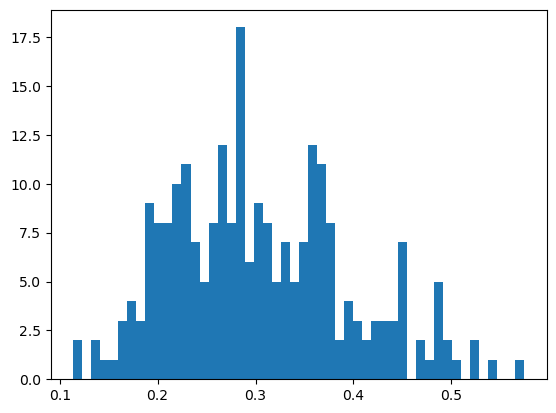

In [17]:
print(f"Mean End Velocity: {np.mean(end_velocities)}")
print(f"STD End Velocity: {np.std(end_velocities)}")

fig, ax = plt.subplots()
ax.hist(end_velocities, bins=50)